# CUDA LAB - Logistic Regression

#### Learning Curve, Gradient Norm and Confusion Matrix for 5 of the better models(out of 36 permutations of learning rate, batch size and hidden dimensions with LeakyReLu) are shown below. (Model number, model paarameters, plot title, legend are mentioned alongwith each plot)

# Required Libraries

In [1]:
import torch
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import random as rand
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# CIFAR10 Dataset

In [2]:
train_dataset = dsets.CIFAR10(root='data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.CIFAR10(root='data', train=False, transform=transforms.ToTensor(), download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(len(train_dataset))
print(len(test_dataset))

50000
10000


In [4]:
print(type(train_dataset))
print(type(train_dataset[0][0]))

<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'torch.Tensor'>


In [5]:
num_samples = len(train_dataset)

### The variables storing losses, accuracies and norm of some of the best models (associated with their model number).

In [6]:
loss_hist15 = []
acc_hist15 = []

loss_hist20 = []
acc_hist20 = []

loss_hist25 = []
acc_hist25 = []

loss_hist30 = []
acc_hist30 = []

loss_hist34 = []
acc_hist34 = []

grad_norm15 = []
grad_norm20 = []
grad_norm25 = []
grad_norm30 = []
grad_norm34 = []
total_norm=0

## A simple Logistic Regression model using LeakyRelu (Using just one hidden layer)

In [7]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.input_dim = input_dim
        self.model = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.LeakyReLU(negative_slope=0.001, inplace=False),
                nn.Linear(hidden_dim, output_dim)
            )
    def forward(self, x):
        x_flat = x.view(-1, self.input_dim)
        out = self.model(x_flat)
        return out

## The function that ran all models is at the end of the file with title "Main Code".
## logistic_accuracy.csv is the file containing accuracies alongwith parameters of different models. 
### Best Accuracy obtained was for model number 30(index starts from 0): 56.26% .
### (logistic_losses.csv is the other file containg losses from all 36 models)

In [57]:
df_acc = pd.read_csv('logistic_accuracy.csv')
print(df_acc.shape)
df_acc

# Models with best accuracies
# 15,20,25,30,34 = 50.85, 51.07, 54.92, 56.26, 56.02

(36, 5)


,Model,Learning Rate,Hidden Dim,Batch Size,Accuracy
0,0,0.0100,512.0,64.0,39.35
1,1,0.0100,1024.0,64.0,36.77
2,2,0.0100,1536.0,64.0,37.63
3,3,0.0100,2048.0,64.0,31.89
4,4,0.0100,512.0,128.0,36.90
5,5,0.0100,1024.0,128.0,38.30
6,6,0.0100,1536.0,128.0,35.66
7,7,0.0100,2048.0,128.0,37.80
8,8,0.0100,512.0,256.0,38.90
9,9,0.0100,1024.0,256.0,40.45


### Losses of all models for 75 epochs

In [55]:
df_losses = pd.read_csv('logistic_losses.csv')
print(df_losses.shape)
df_losses.head()

(75, 37)


,Epochs,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,0,2.463491,2.741353,3.082163,3.231412,2.515790,3.534187,3.745000,4.146330,3.682063,...,1.869975,1.862023,1.927775,1.910592,1.893599,1.888203,1.960068,1.940600,1.923993,1.918973
1,1,1.986387,1.963503,2.112456,2.048855,1.917172,1.960223,2.035114,2.104382,1.914250,...,1.692810,1.680205,1.772946,1.744648,1.728580,1.716179,1.801623,1.784875,1.762447,1.752406
2,2,1.915966,1.961473,1.957747,2.022454,1.859596,1.867334,1.920001,2.004120,1.866299,...,1.615364,1.599863,1.703495,1.666828,1.647662,1.631966,1.742494,1.708574,1.686476,1.674001
3,3,1.880952,1.890834,2.023426,2.046490,1.831099,1.844047,1.863822,1.943074,1.805792,...,1.561378,1.550165,1.654705,1.611317,1.591520,1.578041,1.694051,1.654743,1.631174,1.624297
4,4,1.872991,1.891915,1.992075,2.071091,1.801749,1.856666,1.819390,1.948491,1.785771,...,1.519116,1.507389,1.615798,1.571636,1.553013,1.539429,1.653598,1.615464,1.586273,1.583436


## Parameters

In [115]:

device = "cuda"
model_num = 30      #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
num_epochs = 75
batch_size = int(df_acc.iloc[model_num]['Batch Size'])

in_dim = 3072
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])
out_dim = 10

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

model = LogisticRegression(in_dim, hidden_dim, out_dim)
model = model.to(device)
print(model)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(),lr = lr)

Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536
LogisticRegression(
  (model): Sequential(
    (0): Linear(in_features=3072, out_features=1536, bias=True)
    (1): LeakyReLU(negative_slope=0.001)
    (2): Linear(in_features=1536, out_features=10, bias=True)
  )
)


In [116]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# The model running for given number of epochs

In [117]:
for epoch in range(num_epochs):
    loss_list = []
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
    for i, (imgs, labels) in progress_bar:
        
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        # computing error
        loss = criterion(pred_labels, labels)
        loss_list.append(loss.item())
    
        
        # removing accumulated gradients
        optimizer.zero_grad()
        loss.backward()
        
        
# https://discuss.pytorch.org/t/check-the-norm-of-gradients/27961        
        
        total_norm=0
        for p in model.parameters():
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
        total_norm = total_norm ** (1. / 2)
        
# https://discuss.pytorch.org/t/how-to-check-norm-of-gradients/13795/3

        #for p in list(filter(lambda p: p.grad is not None, model.parameters())):
        #    print(p.grad.data.norm(2).item())
        
        optimizer.step()
    
        if(i % 1 == 0 or i == N_ITERS-1):
            progress_bar.set_description(f"Epoch {epoch+1} Iter {i+1}: loss {loss.item():.5f}. ")
            
    loss_hist30.append(np.mean(loss_list))    #change here
    
    
    
    n_correct = 0

    with torch.no_grad():
        progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
        for i, (imgs, labels) in progress_bar: 
            #everything needs to be on the same device
            imgs = imgs.to(device)
            labels = labels.to(device)

            # forward pass
            pred_labels = model(imgs)

            preds = torch.argmax(pred_labels, dim=-1)
            cur_correct = len(torch.where(preds == labels)[0])
            n_correct = n_correct + cur_correct

    accuracy = n_correct / len(test_dataset) * 100
    #print(f"Test accuracy: {round(accuracy,2)}%")
    
    acc_hist30.append(accuracy)            #change here
    
    grad_norm30.append(total_norm)         #change here
    
    

100%|██████████████████████████████████████████| 79/79 [00:01<00:00, 77.95it/s]


# The Learning Curve using matplotlib

Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536


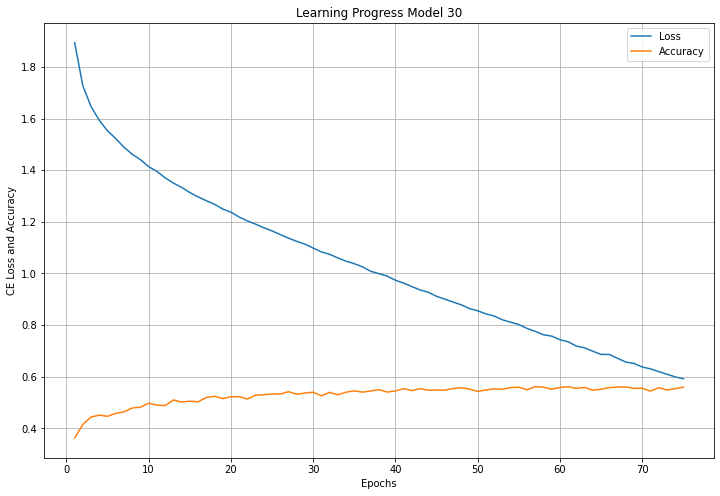

In [118]:
temp_acc = [x * 0.01 for x in acc_hist30]     #change here

x = np.arange(1, len(loss_hist30)+1)
plt.figure(figsize=(12,8))
plt.plot(x, loss_hist30,label = 'Loss')       #change here
plt.plot(x, temp_acc,label = 'Accuracy')     
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("CE Loss and Accuracy")
plt.title("Learning Progress Model 30")        #change here
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

plt.show()

# The confusion matrix (seaborn for better visualisation)

100%|██████████████████████████████████████████| 79/79 [00:02<00:00, 27.18it/s]


Test accuracy: 55.89%
Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536


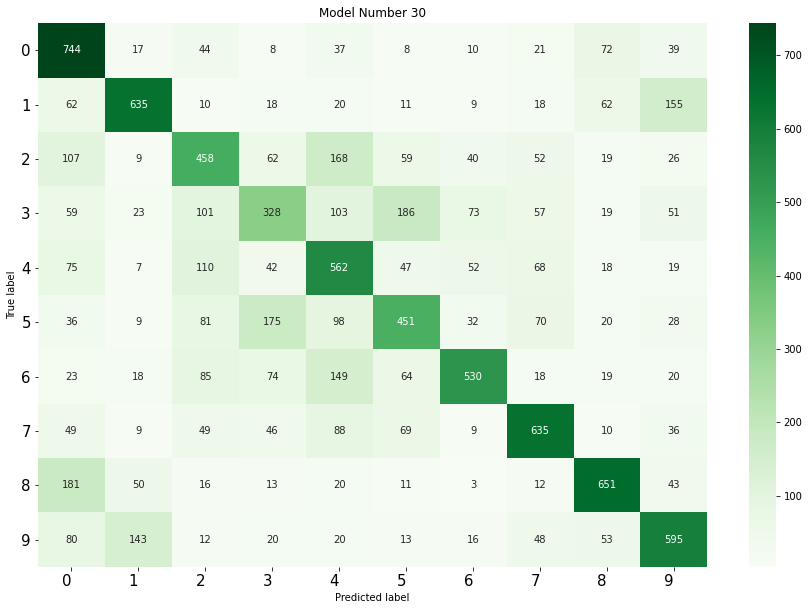

In [120]:
n_correct = 0

nb_classes = 10
confusion_matrix = np.zeros((nb_classes, nb_classes))

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        preds = torch.argmax(pred_labels, dim=-1)
        cur_correct = len(torch.where(preds == labels)[0])
        n_correct = n_correct + cur_correct
        
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = range(10)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Number 30')     #change here
#https://stackoverflow.com/questions/53290306/confusion-matrix-and-test-accuracy-for-pytorch-transfer-learning-tutorial
        
        
accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

# The Gradient Norm

Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536


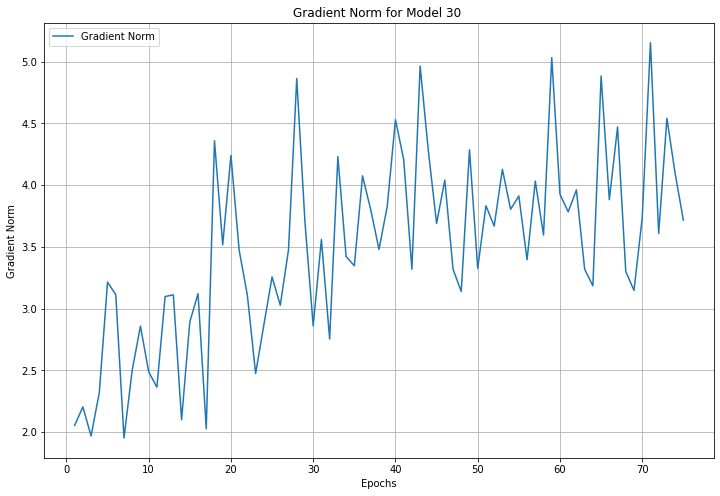

In [119]:
x = np.arange(1, len(loss_hist30)+1)     #change here
plt.figure(figsize=(12,8))
plt.plot(x, grad_norm30,label = 'Gradient Norm')      #change here
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.title("Gradient Norm for Model 30 ")     #change here    
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

plt.show()

# Storing Loss, Accuracy and Gradient of some of the best models

In [80]:
num = range(num_epochs)
df_loss = pd.DataFrame(num,columns = ['Epochs'])
df_loss['Loss'] = pd.DataFrame(loss_hist34, columns = ['Loss'])  #change here
df_loss.to_csv('Model_loss_34.csv', sep=',',index = False)       #change here
df_loss.head()

,Epochs,Loss
0,0,1.922355
1,1,1.761498
2,2,1.686150
3,3,1.633172
4,4,1.591352


In [81]:
num = range(num_epochs)
df_a = pd.DataFrame(num,columns = ['Epochs'])
df_a['Accuracy'] = pd.DataFrame(acc_hist34, columns = ['Accuracy'])  #change here
df_a.to_csv('Model_acc_34.csv', sep=',',index = False)       #change here
df_a.head()

,Epochs,Accuracy
0,0,36.13
1,1,39.80
2,2,42.20
3,3,43.42
4,4,43.73


In [82]:
num = range(num_epochs)
df_n = pd.DataFrame(num,columns = ['Epochs'])
df_n['Grad_norm'] = pd.DataFrame(grad_norm34, columns = ['Grad_norm'])  #change here
df_n.to_csv('Model_grad_34.csv', sep=',',index = False)       #change here
df_n.head()

,Epochs,Grad_norm
0,0,1.890917
1,1,2.976793
2,2,2.475196
3,3,1.543754
4,4,2.277458


Learning Rate =  0.001 Batch Size =  64 Hidden Dim =  2048 max Accuracy =  50.85


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

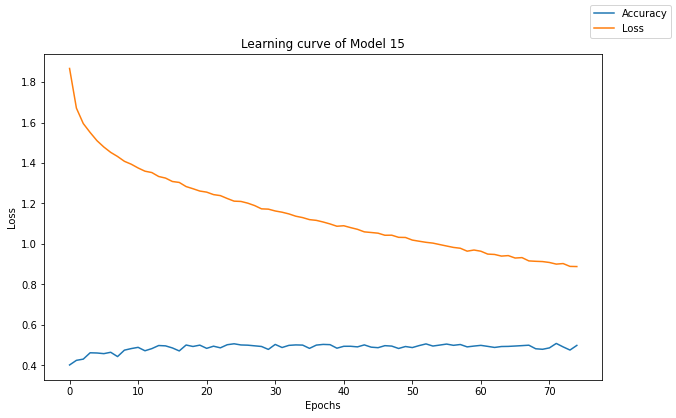

In [94]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 15    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])


df_a = pd.read_csv('Model_acc_15.csv')      #change here
df_loss = pd.read_csv('Model_loss_15.csv')  #change here
df_n = pd.read_csv('Model_grad_15.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])
fig = plt.figure(figsize=(10,6))
df_a["Accuracy"] = 0.01 * df_a["Accuracy"]
p = sns.lineplot(data=df_a, x="Epochs", y='Accuracy')
p = sns.lineplot(data=df_loss, x="Epochs", y='Loss')
fig.legend(labels=['Accuracy','Loss'])
p.set_title("Learning curve of Model 15")   # change here
p.set(xlabel='Epochs', ylabel='Loss')

Learning Rate =  0.001 Batch Size =  256 Hidden Dim =  512 max Accuracy =  51.07000000000001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

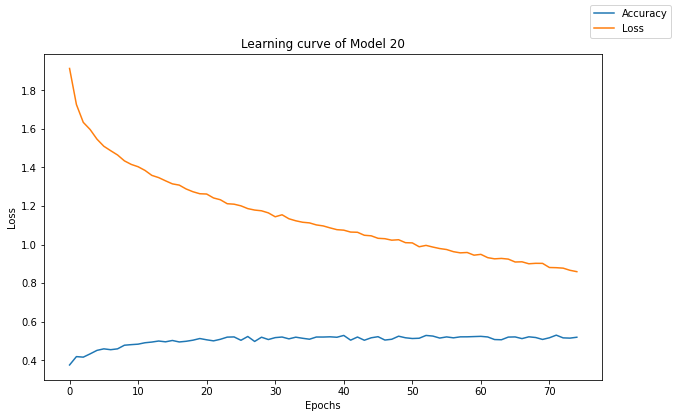

In [95]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 20    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])


df_a = pd.read_csv('Model_acc_20.csv')      #change here
df_loss = pd.read_csv('Model_loss_20.csv')  #change here
df_n = pd.read_csv('Model_grad_20.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])
fig = plt.figure(figsize=(10,6))
df_a["Accuracy"] = 0.01 * df_a["Accuracy"]
p = sns.lineplot(data=df_a, x="Epochs", y='Accuracy')
p = sns.lineplot(data=df_loss, x="Epochs", y='Loss')
fig.legend(labels=['Accuracy','Loss'])
p.set_title("Learning curve of Model 20")   # change here
p.set(xlabel='Epochs', ylabel='Loss')

Learning Rate =  0.0001 Batch Size =  64 Hidden Dim =  1024 max Accuracy =  54.92


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

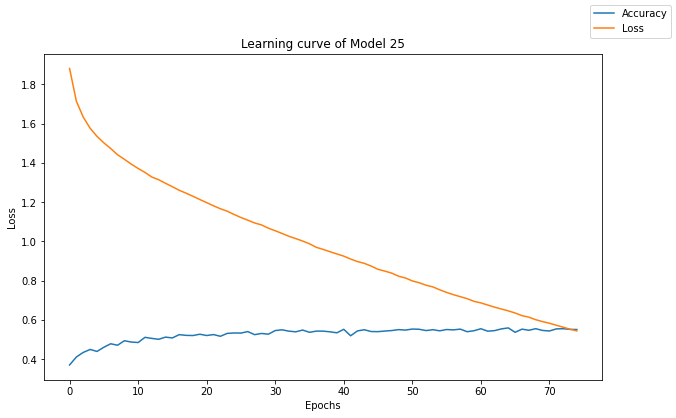

In [96]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 25    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])


df_a = pd.read_csv('Model_acc_25.csv')      #change here
df_loss = pd.read_csv('Model_loss_25.csv')  #change here
df_n = pd.read_csv('Model_grad_25.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])
fig = plt.figure(figsize=(10,6))
df_a["Accuracy"] = 0.01 * df_a["Accuracy"]
p = sns.lineplot(data=df_a, x="Epochs", y='Accuracy')
p = sns.lineplot(data=df_loss, x="Epochs", y='Loss')
fig.legend(labels=['Accuracy','Loss'])
p.set_title("Learning curve of Model 25")   # change here
p.set(xlabel='Epochs', ylabel='Loss')

Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536 max Accuracy =  56.26


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

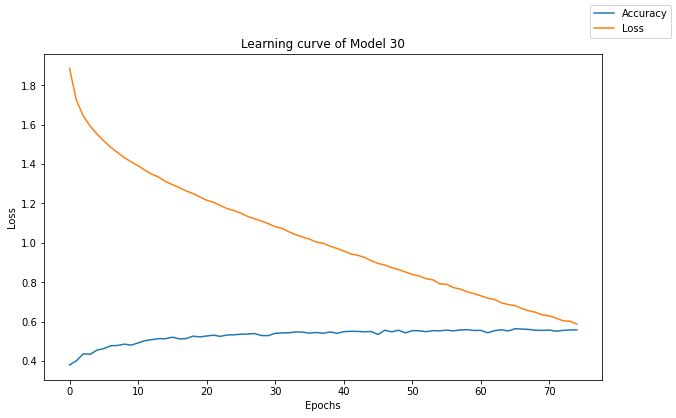

In [97]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 30    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])


df_a = pd.read_csv('Model_acc_30.csv')      #change here
df_loss = pd.read_csv('Model_loss_30.csv')  #change here
df_n = pd.read_csv('Model_grad_30.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])
fig = plt.figure(figsize=(10,6))
df_a["Accuracy"] = 0.01 * df_a["Accuracy"]
p = sns.lineplot(data=df_a, x="Epochs", y='Accuracy')
p = sns.lineplot(data=df_loss, x="Epochs", y='Loss')
fig.legend(labels=['Accuracy','Loss'])
p.set_title("Learning curve of Model 30")   # change here
p.set(xlabel='Epochs', ylabel='Loss')

Learning Rate =  0.0001 Batch Size =  256 Hidden Dim =  1536 max Accuracy =  56.02


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

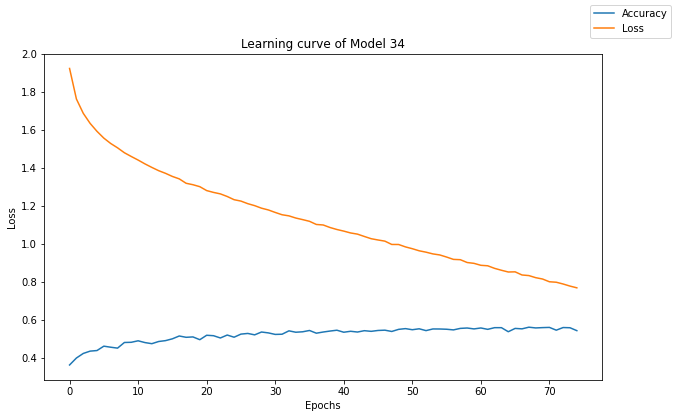

In [98]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 34    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])


df_a = pd.read_csv('Model_acc_34.csv')      #change here
df_loss = pd.read_csv('Model_loss_34.csv')  #change here
df_n = pd.read_csv('Model_grad_34.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])
fig = plt.figure(figsize=(10,6))
df_a["Accuracy"] = 0.01 * df_a["Accuracy"]
p = sns.lineplot(data=df_a, x="Epochs", y='Accuracy')
p = sns.lineplot(data=df_loss, x="Epochs", y='Loss')
fig.legend(labels=['Accuracy','Loss'])
p.set_title("Learning curve of Model 34")   # change here
p.set(xlabel='Epochs', ylabel='Loss')

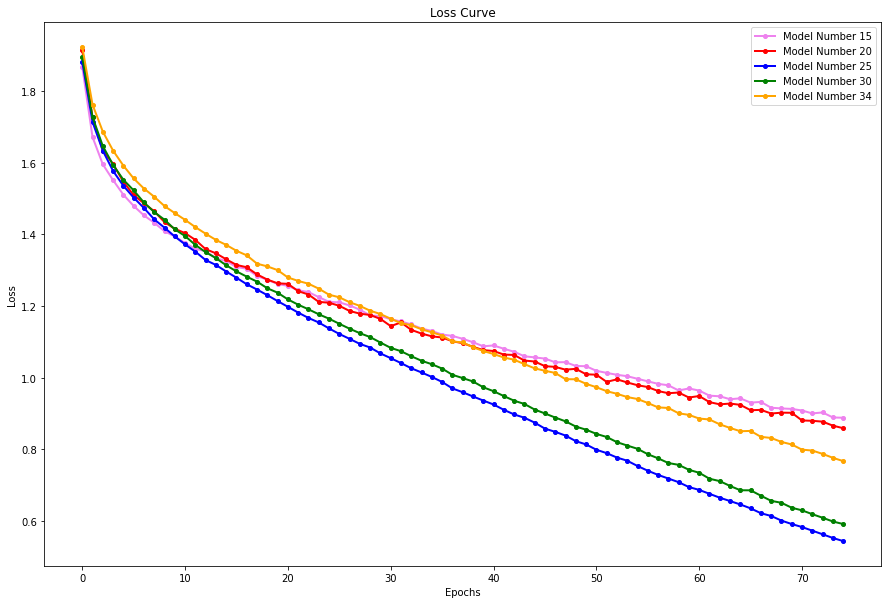

In [126]:
x_axis = list(range(0,75))
fig = plt.figure(figsize=(15,10))
plt.plot(x_axis, loss_hist15, marker = 'o', markerfacecolor='violet', markersize = 4, color = 'violet', linewidth = 2, label = "Model Number 15")
plt.plot(x_axis, loss_hist20, marker = 'o', markerfacecolor='red', markersize = 4, color = 'red', linewidth = 2, label = "Model Number 20")
plt.plot(x_axis, loss_hist25, marker = 'o', markerfacecolor='blue', markersize = 4, color = 'blue', linewidth = 2, label = "Model Number 25")
plt.plot(x_axis, loss_hist30, marker = 'o', markerfacecolor='green', markersize = 4, color = 'green', linewidth = 2, label = "Model Number 30")
plt.plot(x_axis, loss_hist34, marker = 'o', markerfacecolor='orange', markersize = 4, color = 'orange', linewidth = 2, label = "Model Number 34")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.show()

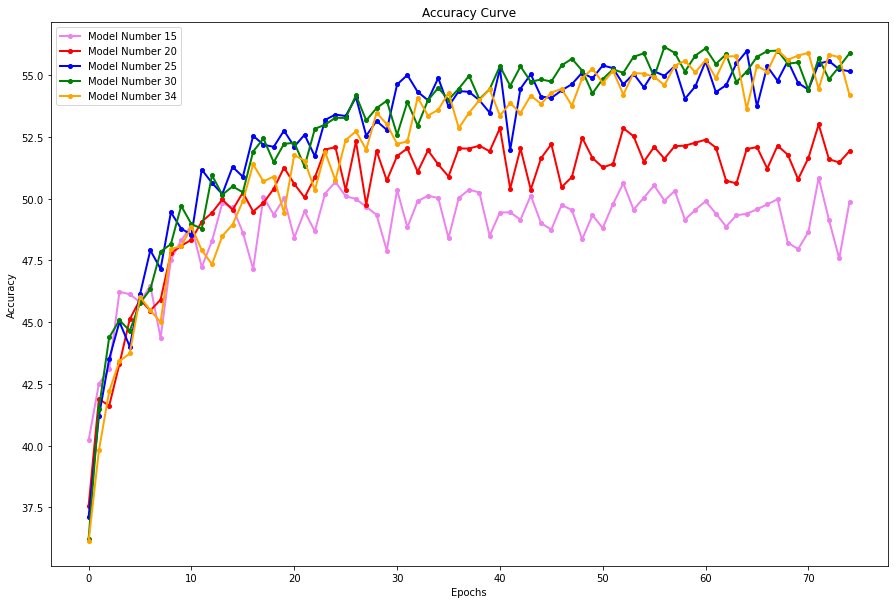

In [127]:
x_axis = list(range(0,75))
fig = plt.figure(figsize=(15,10))
plt.plot(x_axis, acc_hist15, marker = 'o', markerfacecolor='violet', markersize = 4, color = 'violet', linewidth = 2, label = "Model Number 15")
plt.plot(x_axis, acc_hist20, marker = 'o', markerfacecolor='red', markersize = 4, color = 'red', linewidth = 2, label = "Model Number 20")
plt.plot(x_axis, acc_hist25, marker = 'o', markerfacecolor='blue', markersize = 4, color = 'blue', linewidth = 2, label = "Model Number 25")
plt.plot(x_axis, acc_hist30, marker = 'o', markerfacecolor='green', markersize = 4, color = 'green', linewidth = 2, label = "Model Number 30")
plt.plot(x_axis, acc_hist34, marker = 'o', markerfacecolor='orange', markersize = 4, color = 'orange', linewidth = 2, label = "Model Number 34")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")
plt.show()

# Gradient Norm of the 5 models

Learning Rate =  0.001 Batch Size =  64 Hidden Dim =  2048 max Accuracy =  50.85


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Gradient Norm')]

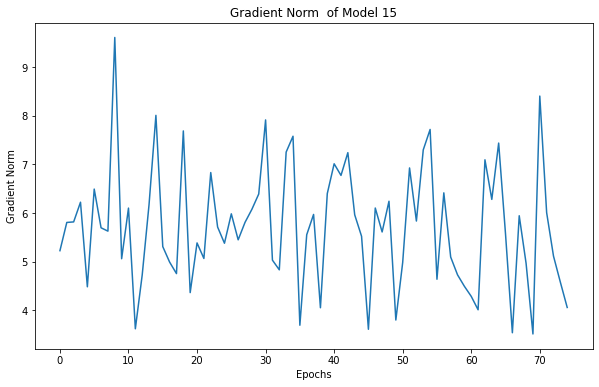

In [103]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 15    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])

df_n = pd.read_csv('Model_grad_15.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])

fig = plt.figure(figsize=(10,6))
p = sns.lineplot(data=df_n, x="Epochs", y='Grad_norm')
p.set_title("Gradient Norm  of Model 15")
p.set(xlabel='Epochs', ylabel='Gradient Norm')  #change here

Learning Rate =  0.001 Batch Size =  256 Hidden Dim =  512 max Accuracy =  51.07000000000001


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Gradient Norm')]

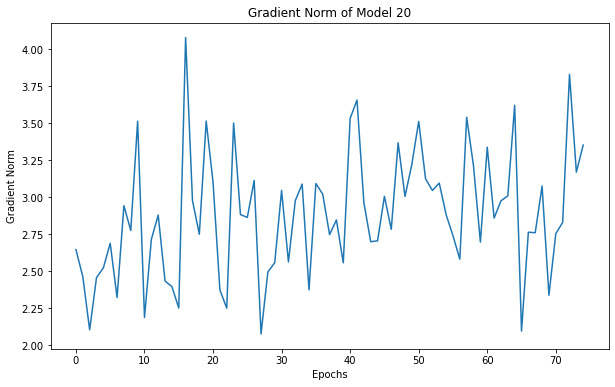

In [104]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 20    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])

df_n = pd.read_csv('Model_grad_20.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])

fig = plt.figure(figsize=(10,6))
p = sns.lineplot(data=df_n, x="Epochs", y='Grad_norm')
p.set_title("Gradient Norm of Model 20")
p.set(xlabel='Epochs', ylabel='Gradient Norm')  #change here

Learning Rate =  0.0001 Batch Size =  64 Hidden Dim =  1024 max Accuracy =  54.92


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Gradient Norm')]

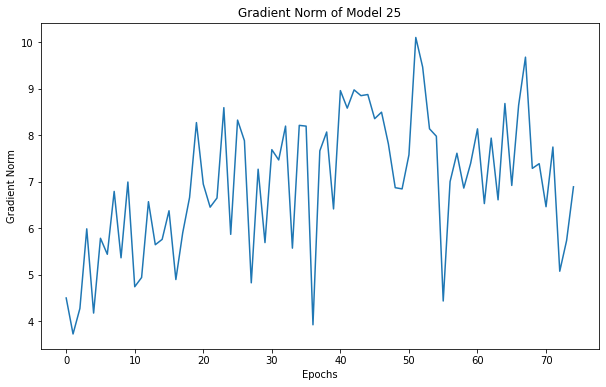

In [105]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 25    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])

df_n = pd.read_csv('Model_grad_25.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])

fig = plt.figure(figsize=(10,6))
p = sns.lineplot(data=df_n, x="Epochs", y='Grad_norm')
p.set_title("Gradient Norm of Model 25")
p.set(xlabel='Epochs', ylabel='Gradient Norm')  #change here

Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536 max Accuracy =  56.26


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Gradient Norm')]

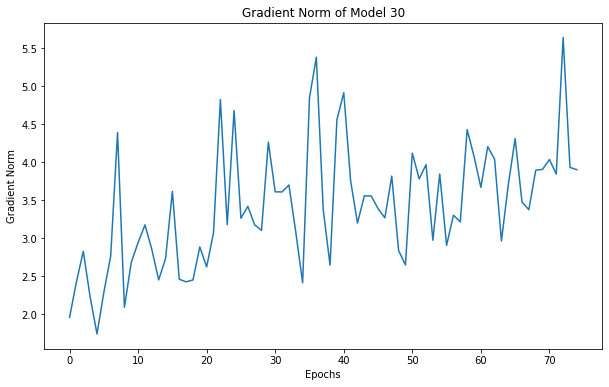

In [106]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 30    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])

df_n = pd.read_csv('Model_grad_30.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])

fig = plt.figure(figsize=(10,6))
p = sns.lineplot(data=df_n, x="Epochs", y='Grad_norm')
p.set_title("Gradient Norm of Model 30")
p.set(xlabel='Epochs', ylabel='Gradient Norm')  #change here

Learning Rate =  0.0001 Batch Size =  256 Hidden Dim =  1536 max Accuracy =  56.02


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Gradient Norm')]

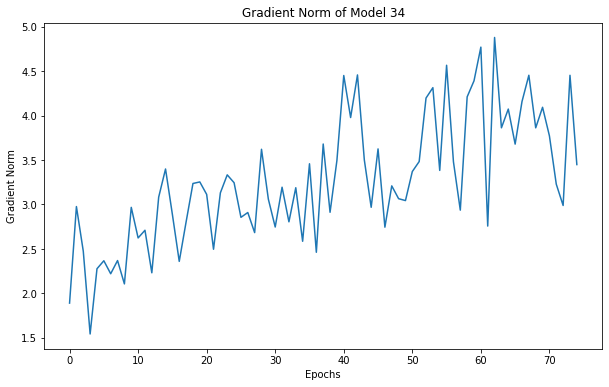

In [107]:
df_acc = pd.read_csv('logistic_accuracy.csv')

model_num = 34    #change here


lr = float(df_acc.iloc[model_num]['Learning Rate'])
batch_size = int(df_acc.iloc[model_num]['Batch Size'])
hidden_dim = int(df_acc.iloc[model_num]['Hidden Dim'])

df_n = pd.read_csv('Model_grad_34.csv')     #change here

print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim, 'max Accuracy = ',df_acc.iloc[model_num]['Accuracy'])

fig = plt.figure(figsize=(10,6))
p = sns.lineplot(data=df_n, x="Epochs", y='Grad_norm')
p.set_title("Gradient Norm of Model 34")
p.set(xlabel='Epochs', ylabel='Gradient Norm')  #change here

# Confusion Matrices of the 5 Models

100%|████████████████████████████████████████| 157/157 [00:02<00:00, 54.03it/s]


Test accuracy: 49.88%
Learning Rate =  0.001 Batch Size =  64 Hidden Dim =  2048


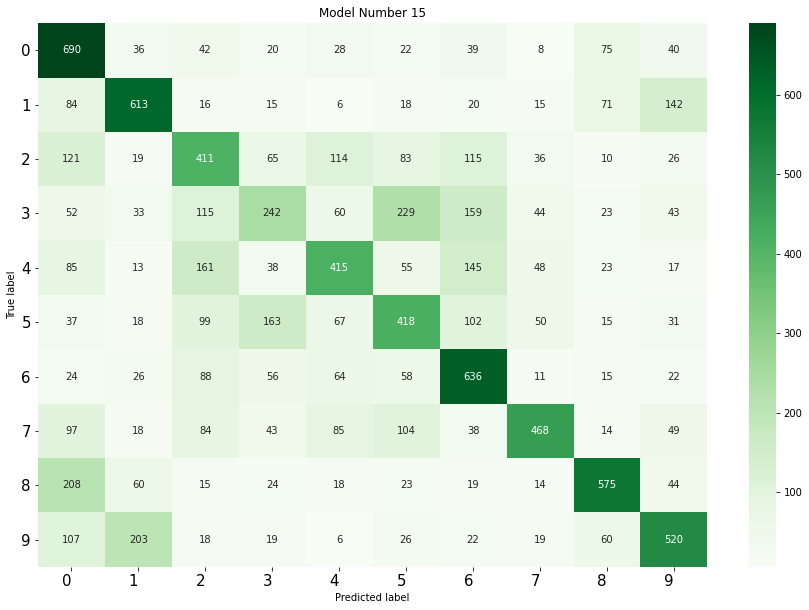

In [15]:
n_correct = 0

nb_classes = 10
confusion_matrix = np.zeros((nb_classes, nb_classes))

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        preds = torch.argmax(pred_labels, dim=-1)
        cur_correct = len(torch.where(preds == labels)[0])
        n_correct = n_correct + cur_correct
        
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = range(10)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Number 15')     #change here
#https://stackoverflow.com/questions/53290306/confusion-matrix-and-test-accuracy-for-pytorch-transfer-learning-tutorial
        
        
accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

# Confusion Matrix of Model 20

100%|██████████████████████████████████████████| 40/40 [00:03<00:00, 13.08it/s]


Test accuracy: 51.93%
Learning Rate =  0.001 Batch Size =  256 Hidden Dim =  512


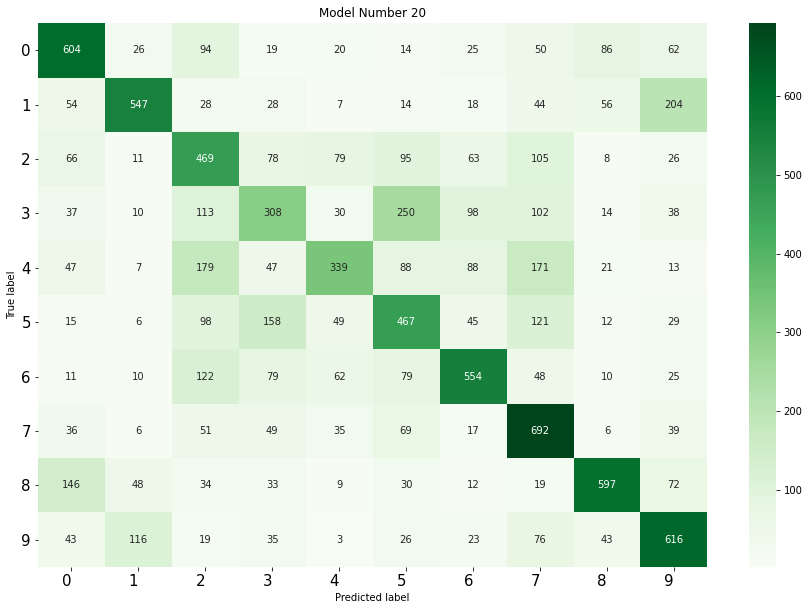

In [53]:
n_correct = 0

nb_classes = 10
confusion_matrix = np.zeros((nb_classes, nb_classes))

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        preds = torch.argmax(pred_labels, dim=-1)
        cur_correct = len(torch.where(preds == labels)[0])
        n_correct = n_correct + cur_correct
        
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = range(10)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Number 20')     #change here
#https://stackoverflow.com/questions/53290306/confusion-matrix-and-test-accuracy-for-pytorch-transfer-learning-tutorial
        
        
accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

# Confusion Matrix of Model 25

100%|████████████████████████████████████████| 157/157 [00:02<00:00, 54.41it/s]


Test accuracy: 55.16%
Learning Rate =  0.0001 Batch Size =  64 Hidden Dim =  1024


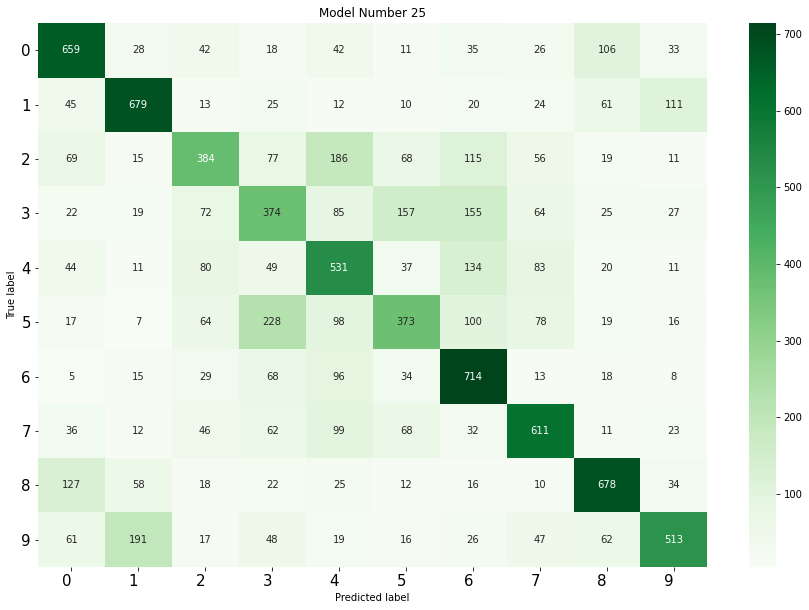

In [65]:
n_correct = 0

nb_classes = 10
confusion_matrix = np.zeros((nb_classes, nb_classes))

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        preds = torch.argmax(pred_labels, dim=-1)
        cur_correct = len(torch.where(preds == labels)[0])
        n_correct = n_correct + cur_correct
        
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = range(10)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Number 25')     #change here
#https://stackoverflow.com/questions/53290306/confusion-matrix-and-test-accuracy-for-pytorch-transfer-learning-tutorial
        
        
accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

# Confusion Matrix of Model 30

100%|██████████████████████████████████████████| 79/79 [00:02<00:00, 27.25it/s]


Test accuracy: 55.83%
Learning Rate =  0.0001 Batch Size =  128 Hidden Dim =  1536


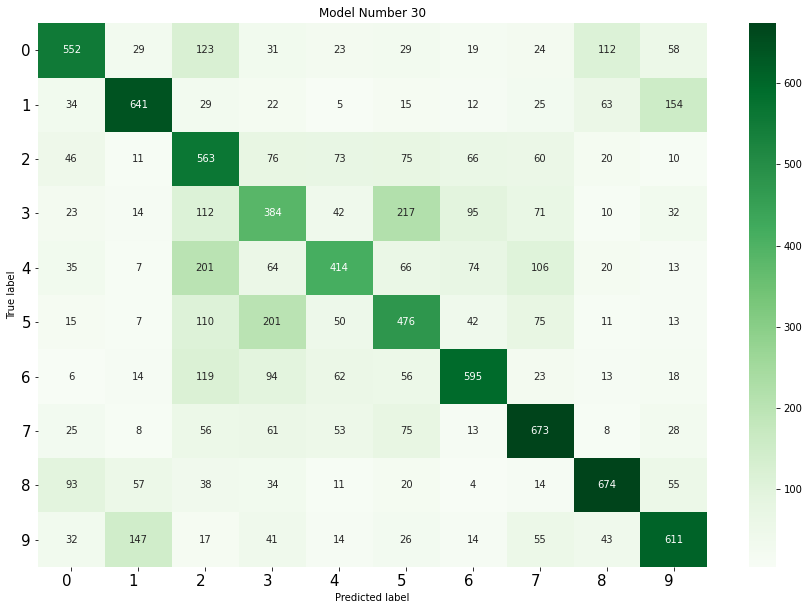

In [74]:
n_correct = 0

nb_classes = 10
confusion_matrix = np.zeros((nb_classes, nb_classes))

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        preds = torch.argmax(pred_labels, dim=-1)
        cur_correct = len(torch.where(preds == labels)[0])
        n_correct = n_correct + cur_correct
        
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = range(10)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Number 30')     #change here
#https://stackoverflow.com/questions/53290306/confusion-matrix-and-test-accuracy-for-pytorch-transfer-learning-tutorial
        
        
accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

# Confusion Matrix of Model 34

100%|██████████████████████████████████████████| 40/40 [00:02<00:00, 14.58it/s]


Test accuracy: 54.2%
Learning Rate =  0.0001 Batch Size =  256 Hidden Dim =  1536


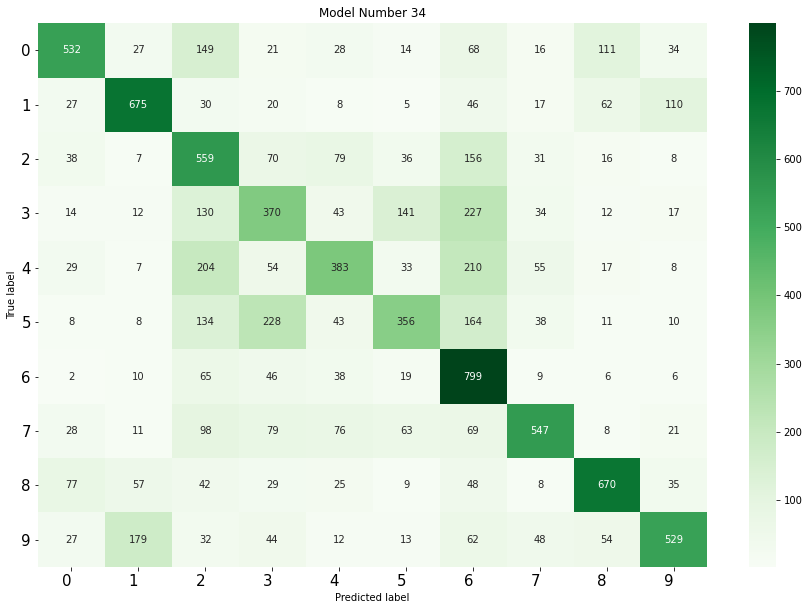

In [83]:
n_correct = 0

nb_classes = 10
confusion_matrix = np.zeros((nb_classes, nb_classes))

with torch.no_grad():
    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        pred_labels = model(imgs)
        
        preds = torch.argmax(pred_labels, dim=-1)
        cur_correct = len(torch.where(preds == labels)[0])
        n_correct = n_correct + cur_correct
        
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = range(10)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Greens")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Model Number 34')     #change here
#https://stackoverflow.com/questions/53290306/confusion-matrix-and-test-accuracy-for-pytorch-transfer-learning-tutorial
        
        
accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")
print('Learning Rate = ',lr, 'Batch Size = ',batch_size, 'Hidden Dim = ', hidden_dim)

# Main Code

## The function that trained 36 models with varying parameters¶

In [ ]:
def run_models(lr_rate, eps, batches, in_dims, hidden_dims, out_dims, train_loader, test_loader):
    lr = lr_rate
    num_epochs = eps
    batch_size = batches

    in_dim = in_dims
    hidden_dim = hidden_dims
    out_dim = out_dims
    
    loss_hist  = []

    for epoch in range(num_epochs):
        loss_list = []
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
        for i, (imgs, labels) in progress_bar:

            #everything needs to be on the same device
            imgs = imgs.to(device)
            labels = labels.to(device)

            # forward pass
            pred_labels = model(imgs)

            # computing error
            loss = criterion(pred_labels, labels)
            loss_list.append(loss.item())

            # removing accumulated gradients
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            optimizer.zero_grad()

            if(i % 1 == 0 or i == N_ITERS-1):
                progress_bar.set_description(f"Epoch {epoch+1} Iter {i+1}: loss {loss.item():.5f}. ")

        loss_hist.append(np.mean(loss_list))
                
    return loss_hist

# Different Parameters passed to function

In [ ]:
device = "cuda"

lr_rate = [0.01,0.001,0.0001]
eps = [75]
batches = [64, 128, 256]
in_dims = 3072
hidden_dims = [512, 1024, 1536, 2048]
out_dims = 10

acc_list = []
super_loss = []
super_acc = []
for m_lr_rate in lr_rate:
    for m_eps in eps:
        for m_batches in batches:
            for m_hidden_dims in hidden_dims:
                
                m_loss_list = []
                model = LogisticRegression(in_dims, m_hidden_dims, out_dims)
                model = model.to(device)
                print(model)
                print("Lr_rate = ",m_lr_rate, "Batch_Size = ",m_batches, "Hidden_Dim",m_hidden_dims)
                criterion = nn.CrossEntropyLoss().to(device)
                optimizer = torch.optim.Adam(model.parameters(),lr = m_lr_rate) 
                
                
                train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=m_batches, 
                                           shuffle=True)
 
                test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=m_batches, 
                                          shuffle=False)
                
                
                m_loss_list = run_models(m_lr_rate, m_eps, m_batches, in_dims, m_hidden_dims, out_dims, train_loader, test_loader)
                super_loss.append(m_loss_list)
                
                n_correct = 0

                with torch.no_grad():
                    progress_bar = tqdm(enumerate(test_loader), total=len(test_loader))
                    for i, (imgs, labels) in progress_bar: 
                        #everything needs to be on the same device
                        imgs = imgs.to(device)
                        labels = labels.to(device)

                        # forward pass
                        pred_labels = model(imgs)

                        preds = torch.argmax(pred_labels, dim=-1)
                        cur_correct = len(torch.where(preds == labels)[0])
                        n_correct = n_correct + cur_correct

                accuracy = n_correct / len(test_dataset) * 100
                print(f"Test accuracy: {round(accuracy,2)}%")
                acc_list.append(accuracy)

# Storing all losses, accuracies and parameter values in csv files

In [ ]:
num = range(0,75)
df_loss = pd.DataFrame(num,columns = ['Epochs'])
for i in range(36):
    df_loss[i] = pd.DataFrame(super_loss[i], columns = ['loss'])
    
df_loss.to_csv('logistic_losses.csv', sep=',',index = False)    
df_loss.head()

In [ ]:
num = range(0,36)
df_acc = pd.DataFrame(num,columns = ['Model'])
df_acc['Accuracy'] = pd.DataFrame(acc_list,columns = ['Accuracy'])

In [ ]:
lr_rate = [0.01,0.001,0.0001]
batches = [64, 128, 256]
hidden_dims = [512, 1024, 1536, 2048]

model_params = []

for m_lr_rate in lr_rate:
        for m_batches in batches:
            for m_hidden_dims in hidden_dims:
                model_try = []
                model_try.append(m_lr_rate)
                model_try.append(m_hidden_dims)
                model_try.append(m_batches)
                
                model_params.append(model_try)
                
cols=['Learning Rate','Hidden Dim', 'Batch Size']

df_model = pd.DataFrame(model_params[0])
df_model = df_model.T
df_model.columns = cols
df_model.head()
print(type(df_model))


for i in range(35):
    temp_df = pd.DataFrame(model_params[i+1])
    temp_df = temp_df.T
    temp_df.columns = cols
    df_model = pd.concat([df_model,temp_df],ignore_index =True)


In [ ]:
df = pd.concat([df_acc,df_model],axis=1)
df = df[['Model', 'Learning Rate', 'Hidden Dim', 'Batch Size', 'Accuracy']]

df.to_csv('logistic_accuracy.csv', sep=',',index = False)
df.head()




# END of File